# Live Server

- [Dashboard](https://fastapi-gitlab.herokuapp.com/dash)
- [API](https://fastapi-gitlab.herokuapp.com/docs)

# Feature Engineering
## 1. Create DataFrame
- parse date column

In [1]:
import pandas as pd

In [2]:
df_original = pd.read_csv('data/supermarket.csv', parse_dates=['SHOP_DATE'])
df_original.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

### Table Description
![](data/tab1.png)
![](data/tab2.png)

In [4]:
df = df_original.copy()

In [5]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,...,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,...,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


## 2. Data Preps 

- Check for uniques and drop unecessary features

In [6]:
# Check unique values

unique_table = pd.DataFrame.from_records(
    [(col, df[col].nunique()) for col in df.columns], 
    columns=['Col_Name', 'Uniques']).sort_values(by=['Uniques'])
unique_table

,Col_Name,Uniques
20,STORE_FORMAT,1
21,STORE_REGION,2
19,STORE_CODE,2
15,BASKET_SIZE,3
17,BASKET_TYPE,4
16,BASKET_PRICE_SENSITIVITY,4
12,CUST_PRICE_SENSITIVITY,4
18,BASKET_DOMINANT_MISSION,5
13,CUST_LIFESTAGE,6
2,SHOP_WEEKDAY,7


- Drop STORE_FORMAT

In [7]:
df.drop(columns=['STORE_FORMAT'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

- Check Null

In [9]:
df.isnull().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                   153682
CUST_PRICE_SENSITIVITY      153682
CUST_LIFESTAGE              259315
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_REGION                     0
dtype: int64

In [10]:
df.fillna({'CUST_CODE': 'CUSTXXXXXXXXXX', 
           'CUST_PRICE_SENSITIVITY': 'XX', 
           'CUST_LIFESTAGE': 'XX'}, inplace=True)

In [11]:
df.isna().sum()

SHOP_WEEK                   0
SHOP_DATE                   0
SHOP_WEEKDAY                0
SHOP_HOUR                   0
QUANTITY                    0
SPEND                       0
PROD_CODE                   0
PROD_CODE_10                0
PROD_CODE_20                0
PROD_CODE_30                0
PROD_CODE_40                0
CUST_CODE                   0
CUST_PRICE_SENSITIVITY      0
CUST_LIFESTAGE              0
BASKET_ID                   0
BASKET_SIZE                 0
BASKET_PRICE_SENSITIVITY    0
BASKET_TYPE                 0
BASKET_DOMINANT_MISSION     0
STORE_CODE                  0
STORE_REGION                0
dtype: int64

In [12]:
# cast cols to category
df.select_dtypes(include=['object'])

,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_REGION
0,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,L,MM,Top Up,Grocery,STORE00001,E02
1,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,L,MM,Full Shop,Fresh,STORE00001,E02
2,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,L,MM,Full Shop,Grocery,STORE00001,E02
3,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,L,LA,Full Shop,Mixed,STORE00001,E02
4,PRD0900001,CL00072,DEP00021,G00007,D00002,CUSTXXXXXXXXXX,XX,XX,L,MM,Full Shop,Fresh,STORE00001,E02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956569,PRD0904997,CL00074,DEP00021,G00007,D00002,CUSTXXXXXXXXXX,XX,XX,M,MM,Top Up,Fresh,STORE00002,W01
956570,PRD0904997,CL00074,DEP00021,G00007,D00002,CUSTXXXXXXXXXX,XX,XX,L,LA,Top Up,Fresh,STORE00002,W01
956571,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,L,LA,Top Up,Fresh,STORE00002,W01
956572,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,L,LA,Full Shop,Fresh,STORE00002,W01


- Note: STORE_FORMAT = LS (only 1 unique in this dataset)

In [13]:
col_list = ['CUST_PRICE_SENSITIVITY', 
            'CUST_LIFESTAGE', 
            'BASKET_SIZE', 
            'BASKET_TYPE',
            'BASKET_DOMINANT_MISSION', 
            'STORE_REGION']

def convert_cols_type(dataframe, cols, datatype='category'):
    for col in cols:
        dataframe[col] = dataframe[col].astype(datatype)
    print(dataframe.info())
    return dataframe
        

In [14]:
df = convert_cols_type(df, col_list, 'category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 956574 non-null  object        
 12  CU

In [15]:
def show_category_values(dataframe):
    selected_df = dataframe.select_dtypes('category')
    for c in selected_df.columns:
        print(dataframe[c].cat.categories)

In [16]:
show_category_values(df)

Index(['LA', 'MM', 'UM', 'XX'], dtype='object')
Index(['OA', 'OF', 'OT', 'PE', 'XX', 'YA', 'YF'], dtype='object')
Index(['L', 'M', 'S'], dtype='object')
Index(['Full Shop', 'Small Shop', 'Top Up', 'XX'], dtype='object')
Index(['Fresh', 'Grocery', 'Mixed', 'Nonfood', 'XX'], dtype='object')
Index(['E02', 'W01'], dtype='object')


## 3. Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- See how they spen

In [18]:
df.SPEND.describe()

count    956574.000000
mean          1.871697
std           2.767820
min           0.010000
25%           0.750000
50%           1.200000
75%           2.060000
max         476.160000
Name: SPEND, dtype: float64

In [19]:
# Spend by day

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df.groupby(by=['SHOP_WEEKDAY']).describe()

SHOP_WEEK                                                \
                 count           mean        std       min       25%   
SHOP_WEEKDAY                                                           
1             136386.0  200701.454379  65.665920  200607.0  200636.0   
2             137294.0  200702.862623  65.567684  200607.0  200638.0   
3             136933.0  200702.009362  66.187824  200607.0  200636.0   
4             136853.0  200702.385837  66.118217  200607.0  200637.0   
5             135880.0  200703.150132  65.561524  200607.0  200637.0   
6             138691.0  200702.390595  66.284097  200607.0  200636.0   
7             134537.0  200701.495953  65.584827  200607.0  200636.0   

                                           SHOP_HOUR                       \
                   50%       75%       max     count       mean       std   
SHOP_WEEKDAY                                                                
1             200713.0  200741.0  200819.0  136386.0  14.834492  3.651239   
2             200713.0  200741.0  200819.0  137294.0  14.965570  3.670084   
3             200712.0  200742.0  200819.0  136933.0  14.942899  3.640161   
4             200714.0  200742.0  200819.0  136853.0  14.987234  3.614784   
5             200714.0  200742.0  200819.0  135880.0  15.034479  3.654707   
6             200713.0  200742.0  200819.0  138691.0  14.941979  3.590678   
7             200712.0  200741.0  200819.0  134537.0  14.948230  3.628168   

                                           QUANTITY                           \
              min   25%   50%   75%   max     count      mean       std  min   
SHOP_WEEKDAY                                                                   
1             8.0  12.0  15.0  18.0  21.0  136386.0  1.515339  1.638827  1.0   
2             8.0  12.0  15.0  18.0  21.0  137294.0  1.521465  1.632751  1.0   
3             8.0  12.0  15.0  18.0  21.0  136933.0  1.510585  1.591345  1.0   
4             8.0  12.0  15.0  18.0  21.0  136853.0  1.517497  1.665993  1.0   
5             8.0  12.0  15.0  18.0  21.0  135880.0  1.511304  1.578663  1.0   
6             8.0  12.0  15.0  18.0  21.0  138691.0  1.518671  1.621033  1.0   
7             8.0  12.0  15.0  18.0  21.0  134537.0  1.506953  1.616591  1.0   

                                       SPEND                                  \
              25%  50%  75%    max     count      mean       std   min   25%   
SHOP_WEEKDAY                                                                   
1             1.0  1.0  1.0   96.0  136386.0  1.874765  3.091096  0.01  0.75   
2             1.0  1.0  1.0  103.0  137294.0  1.880013  2.865418  0.01  0.75   
3             1.0  1.0  1.0   87.0  136933.0  1.859131  2.537187  0.01  0.75   
4             1.0  1.0  1.0   87.0  136853.0  1.876838  2.655659  0.01  0.75   
5             1.0  1.0  1.0   69.0  135880.0  1.869883  2.605570  0.01  0.75   
6             1.0  1.0  1.0  129.0  138691.0  1.882323  2.697083  0.01  0.75   
7             1.0  1.0  1.0   96.0  134537.0  1.858536  2.884889  0.01  0.75   

                                 BASKET_ID                              \
               50%   75%     max     count          mean           std   
SHOP_WEEKDAY                                                             
1             1.20  2.06  476.16  136386.0  9.941059e+14  3.328036e+09   
2             1.20  2.06  346.46  137294.0  9.941059e+14  3.308999e+09   
3             1.20  2.06  122.28  136933.0  9.941059e+14  3.338864e+09   
4             1.20  2.06  163.04  136853.0  9.941059e+14  3.343959e+09   
5             1.21  2.06  134.05  135880.0  9.941060e+14  3.323743e+09   
6             1.21  2.06  183.90  138691.0  9.941059e+14  3.354846e+09   
7             1.20  2.04  476.16  134537.0  9.941059e+14  3.325027e+09   

                                                                      \
                       min           25%           50%           75%   
SHOP_WEEKDAY                      

In [20]:
# Mapping weekday name to match data table

from functools import partial

remap_dict = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

def map_weekday(mapping_dict, row_item):
    for k, v in mapping_dict.items():
        if k == row_item: return v
    
map_weekday_with_dict = partial(map_weekday, remap_dict)

df['SHOP_WEEKDAY_NAME'] = df.SHOP_WEEKDAY.apply(partial(map_weekday_with_dict))
df.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_REGION,SHOP_WEEKDAY_NAME
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,E02,Friday
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,E02,Wednesday
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,E02,Sunday


In [21]:
df.groupby(by=['SHOP_WEEKDAY_NAME']).describe()

SHOP_WEEK                                                \
                      count           mean        std       min       25%   
SHOP_WEEKDAY_NAME                                                           
Friday             138691.0  200702.390595  66.284097  200607.0  200636.0   
Monday             137294.0  200702.862623  65.567684  200607.0  200638.0   
Saturday           134537.0  200701.495953  65.584827  200607.0  200636.0   
Sunday             136386.0  200701.454379  65.665920  200607.0  200636.0   
Thursday           135880.0  200703.150132  65.561524  200607.0  200637.0   
Tuesday            136933.0  200702.009362  66.187824  200607.0  200636.0   
Wednesday          136853.0  200702.385837  66.118217  200607.0  200637.0   

                                                SHOP_WEEKDAY                 \
                        50%       75%       max        count mean  std  min   
SHOP_WEEKDAY_NAME                                                             
Friday             200713.0  200742.0  200819.0     138691.0  6.0  0.0  6.0   
Monday             200713.0  200741.0  200819.0     137294.0  2.0  0.0  2.0   
Saturday           200712.0  200741.0  200819.0     134537.0  7.0  0.0  7.0   
Sunday             200713.0  200741.0  200819.0     136386.0  1.0  0.0  1.0   
Thursday           200714.0  200742.0  200819.0     135880.0  5.0  0.0  5.0   
Tuesday            200712.0  200742.0  200819.0     136933.0  3.0  0.0  3.0   
Wednesday          200714.0  200742.0  200819.0     136853.0  4.0  0.0  4.0   

                                      SHOP_HOUR                            \
                   25%  50%  75%  max     count       mean       std  min   
SHOP_WEEKDAY_NAME                                                           
Friday             6.0  6.0  6.0  6.0  138691.0  14.941979  3.590678  8.0   
Monday             2.0  2.0  2.0  2.0  137294.0  14.965570  3.670084  8.0   
Saturday           7.0  7.0  7.0  7.0  134537.0  14.948230  3.628168  8.0   
Sunday             1.0  1.0  1.0  1.0  136386.0  14.834492  3.651239  8.0   
Thursday           5.0  5.0  5.0  5.0  135880.0  15.034479  3.654707  8.0   
Tuesday            3.0  3.0  3.0  3.0  136933.0  14.942899  3.640161  8.0   
Wednesday          4.0  4.0  4.0  4.0  136853.0  14.987234  3.614784  8.0   

                                           QUANTITY                           \
                    25%   50%   75%   max     count      mean       std  min   
SHOP_WEEKDAY_NAME                                                              
Friday             12.0  15.0  18.0  21.0  138691.0  1.518671  1.621033  1.0   
Monday             12.0  15.0  18.0  21.0  137294.0  1.521465  1.632751  1.0   
Saturday           12.0  15.0  18.0  21.0  134537.0  1.506953  1.616591  1.0   
Sunday             12.0  15.0  18.0  21.0  136386.0  1.515339  1.638827  1.0   
Thursday           12.0  15.0  18.0  21.0  135880.0  1.511304  1.578663  1.0   
Tuesday            12.0  15.0  18.0  21.0  136933.0  1.510585  1.591345  1.0   
Wednesday          12.0  15.0  18.0  21.0  136853.0  1.517497  1.665993  1.0   

                                            SPEND                            \
                   25%  50%  75%    max     count      mean       std   min   
SHOP_WEEKDAY_NAME                                                             
Friday             1.0  1.0  1.0  129.0  138691.0  1.882323  2.697083  0.01   
Monday             1.0  1.0  1.0  103.0  137294.0  1.880013  2.865418  0.01   
Saturday           1.0  1.0  1.0   96.0  134537.0  1.858536  2.884889  0.01   
Sunday             1.0  1.0  1.0   96.0  136386.0  1.874765  3.091096  0.01   
Thursday           1.0  1.0  1.0   69.0  135880.0  1.869883  2.605570  0.01   
Tuesday            1.0  1.0  1.0   87.0  136933.0  1.859131  2.537187  0.01   
Wednesday          1.0  1.0  1.0   87.0  136853.0  1.876838  2.655659  0.01   

                                            BASKET_ID                \
                    25

In [22]:
df.groupby(by=['SHOP_WEEKDAY_NAME'])['SPEND'].describe()

,count,mean,std,min,25%,50%,75%,max
SHOP_WEEKDAY_NAME,,,,,,,,
Friday,138691.0,1.882323,2.697083,0.01,0.75,1.21,2.06,183.90
Monday,137294.0,1.880013,2.865418,0.01,0.75,1.20,2.06,346.46
Saturday,134537.0,1.858536,2.884889,0.01,0.75,1.20,2.04,476.16
Sunday,136386.0,1.874765,3.091096,0.01,0.75,1.20,2.06,476.16
Thursday,135880.0,1.869883,2.605570,0.01,0.75,1.21,2.06,134.05
Tuesday,136933.0,1.859131,2.537187,0.01,0.75,1.20,2.06,122.28
Wednesday,136853.0,1.876838,2.655659,0.01,0.75,1.20,2.06,163.04


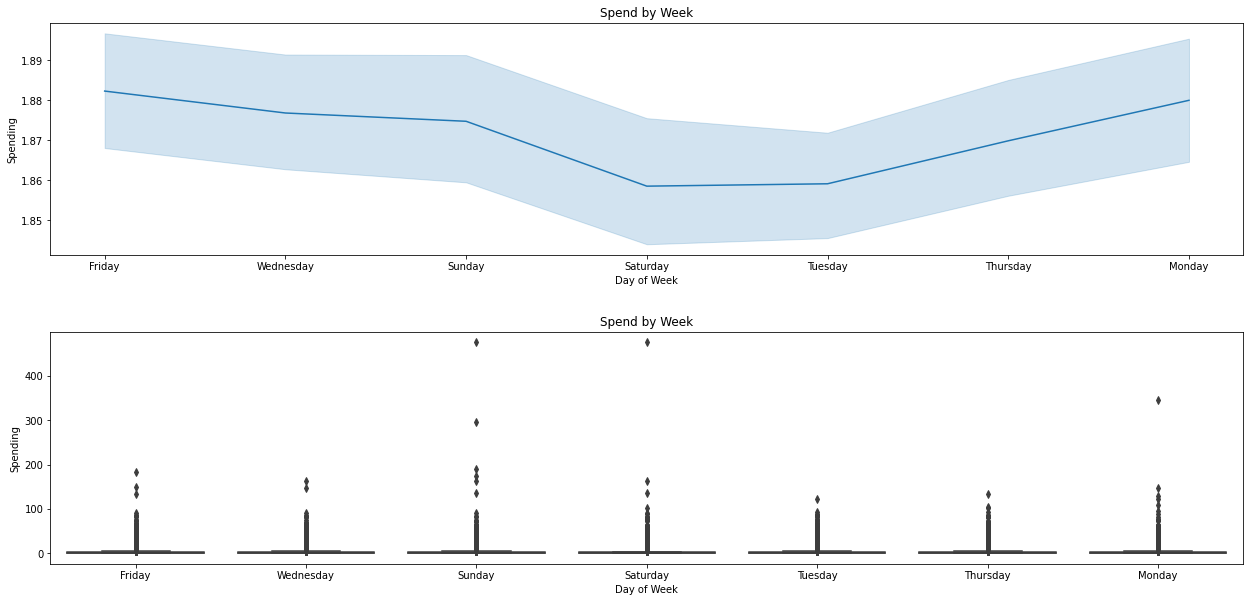

In [23]:
#Plotting number of daily visits
fig = plt.figure(figsize=(18, 9))

# Plot 1
ax1 = fig.add_subplot(2,1,1)
sns.lineplot(x='SHOP_WEEKDAY_NAME',
             y='SPEND',
             data=df,
             ax=ax1)
plt.title('Spend by Week')
plt.ylabel('Spending')
plt.xlabel('Day of Week')

# Plot 2
ax2 = fig.add_subplot(2,1,2)

sns.boxplot(x='SHOP_WEEKDAY_NAME',
            y='SPEND',
            data=df,
            ax=ax2)
plt.title('Spend by Week')
plt.ylabel('Spending')
plt.xlabel('Day of Week')
fig.tight_layout(pad=3.0);

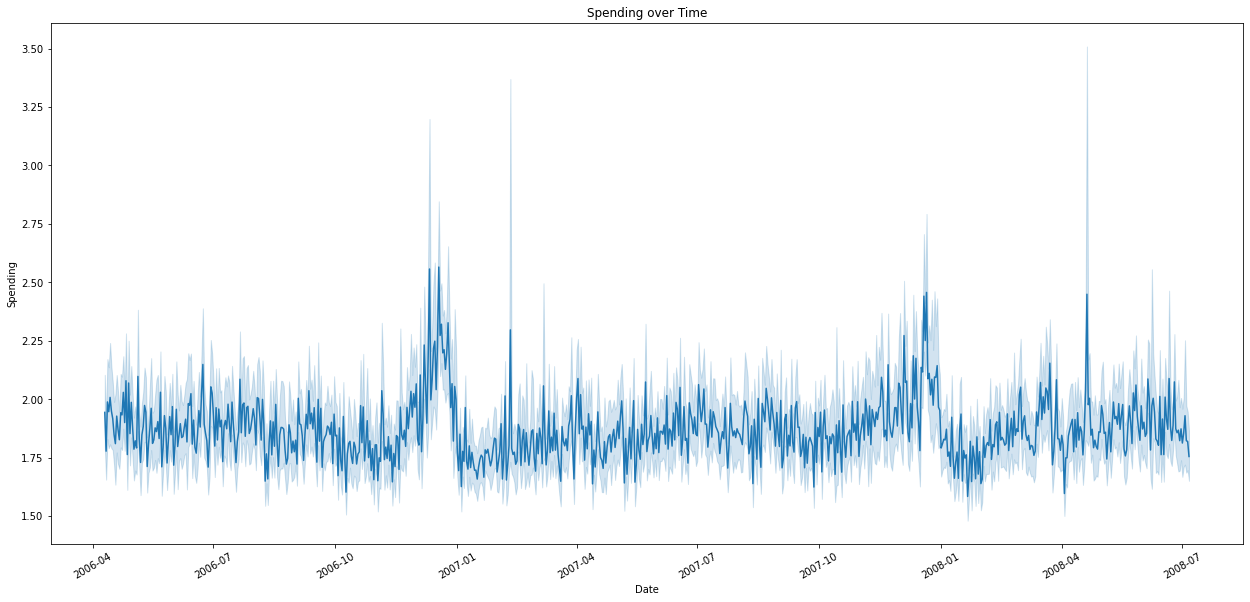

In [24]:
fig = plt.figure(figsize=(18, 9))

sns.lineplot(x='SHOP_DATE',
             y='SPEND',
             data=df) 
plt.title('Spending over Time')
plt.ylabel('Spending')
plt.xlabel('Date')
plt.xticks(rotation=30)

fig.tight_layout(pad=3)
plt.show()

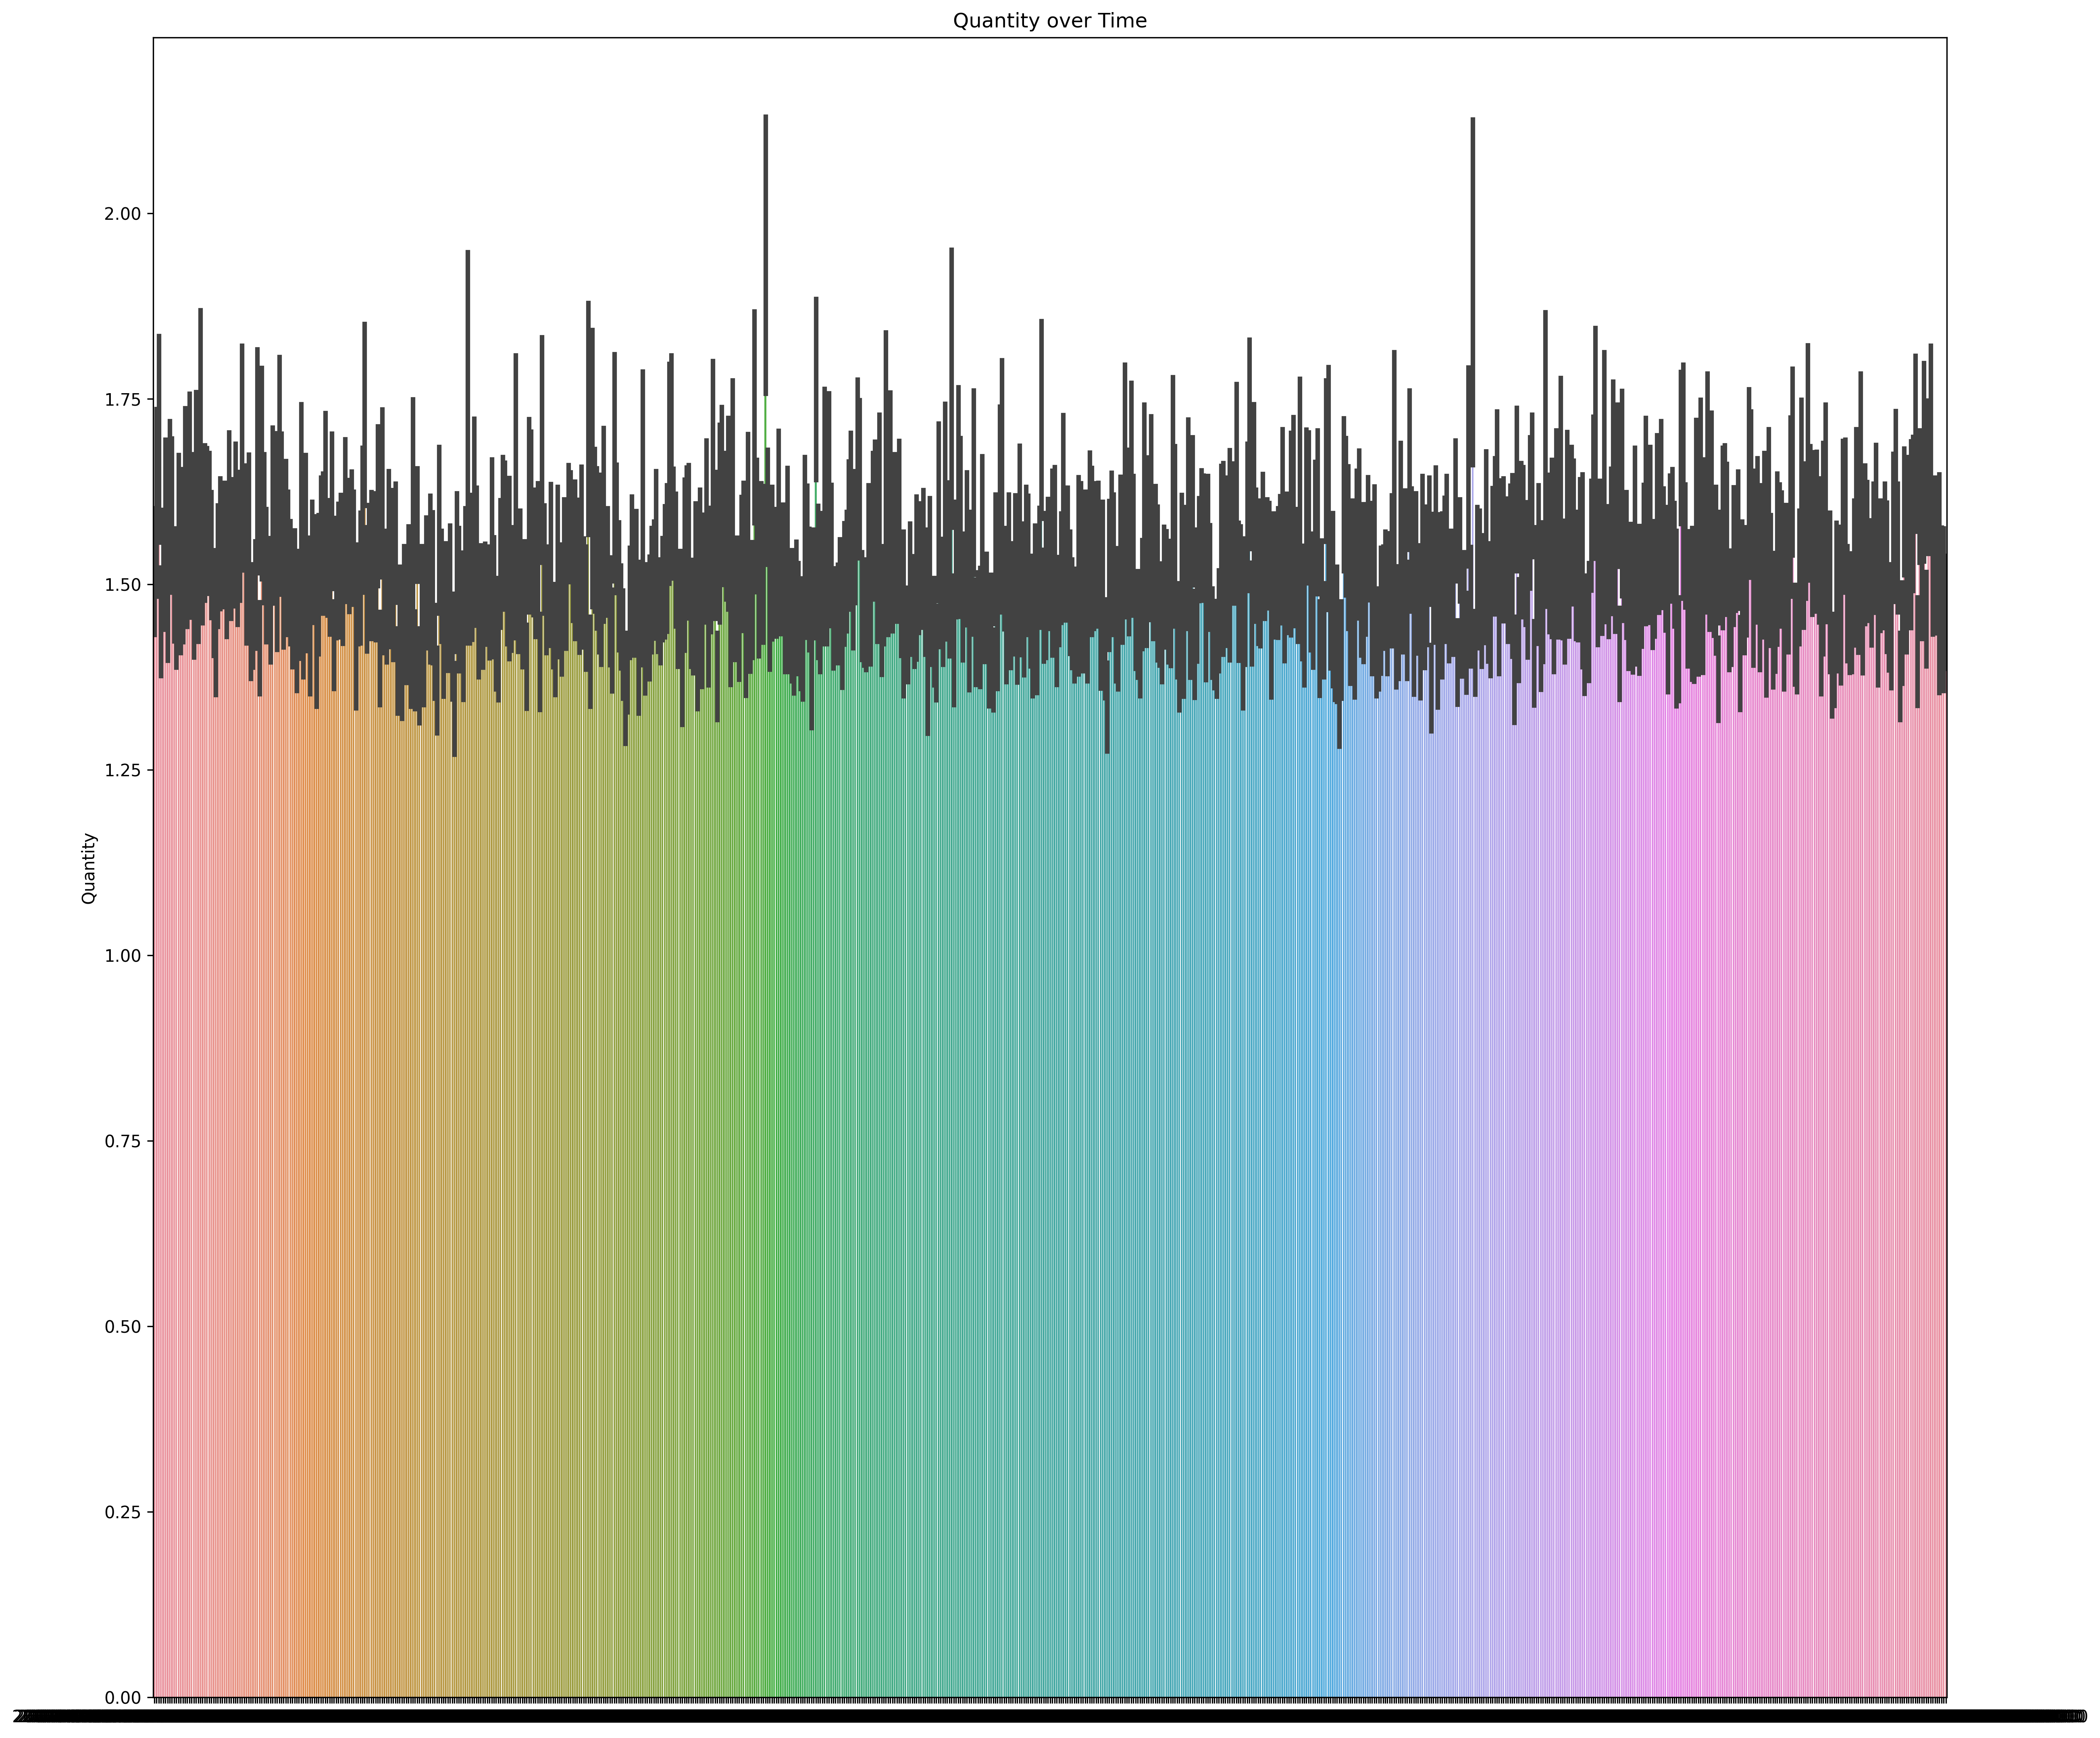

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (18, 15), dpi=300)

sns.barplot(x='SHOP_DATE',
            y='QUANTITY',
            data=df) 

plt.title('Quantity over Time')
plt.ylabel('Quantity')

ax.set_xlabel('')
# ax.set(ylim=(0, df.QUANTITY.max()))

fig.tight_layout(pad=3)
plt.show()

In [26]:
# There is an extreme outlier

df.loc[df.QUANTITY == df.QUANTITY.max()]

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_REGION,SHOP_WEEKDAY_NAME
393545,200706,2007-04-06,6,21,129,41.28,PRD0903448,CL00167,DEP00055,G00016,D00003,CUST0000281062,UM,OT,994105200344533,L,UM,Top Up,Grocery,STORE00001,E02,Friday


In [27]:
df.loc[df.SPEND == df.QUANTITY.max()]

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_REGION,SHOP_WEEKDAY_NAME


<AxesSubplot:xlabel='SHOP_DATE', ylabel='QUANTITY'>

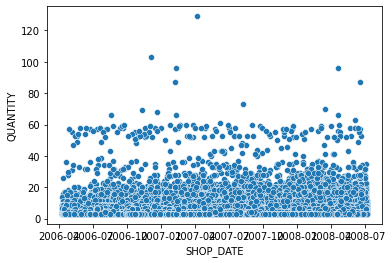

In [28]:
df_test = df.loc[df.QUANTITY > df.QUANTITY.mean()]

sns.scatterplot(x='SHOP_DATE', y='QUANTITY', data=df_test)

<AxesSubplot:xlabel='SHOP_DATE', ylabel='SPEND'>

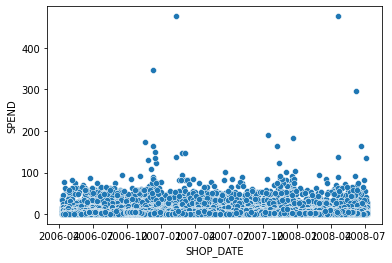

In [29]:
sns.scatterplot(x='SHOP_DATE', y='SPEND', data=df_test)

# Dashboard

In [30]:
!pip install jupyter-dash

In [31]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [32]:
# EXPORT DF FOR WEB APP
df.to_csv("data/supermarket_for_app.csv")

In [33]:
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Supermarket Dashboard"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="SHOP_DATE", y="SPEND", color="QUANTITY",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Spend Over Time"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')